In [4]:
from sklearn import tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

from IPython.display import HTML
style = "<style>svg{width:50% !important;height:50% !important;</style>"
HTML( style )

In [15]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'

In [8]:
titanic_data = pd.read_csv('DataSets/titanic/train.csv')

In [17]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
X = titanic_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y = titanic_data.Survived

## Разобьем строковые переменные на числовые с помощью метода get_dummies()

### One-hot encoding

In [10]:
X = pd.get_dummies(X)

In [11]:
X = X.fillna({'Age' : X.Age.median()})

In [22]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [6]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [7]:
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

In [40]:
plt.figure(figsize=(100, 25))

<Figure size 7200x1800 with 0 Axes>

<Figure size 7200x1800 with 0 Axes>

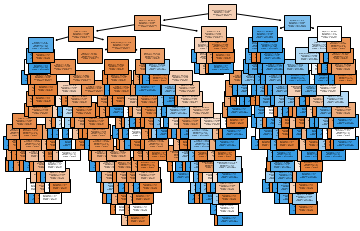

In [17]:
tree.plot_tree(clf, feature_names=list(X), fontsize=2,
               class_names=['Died', 'Survived'],
               filled=True);

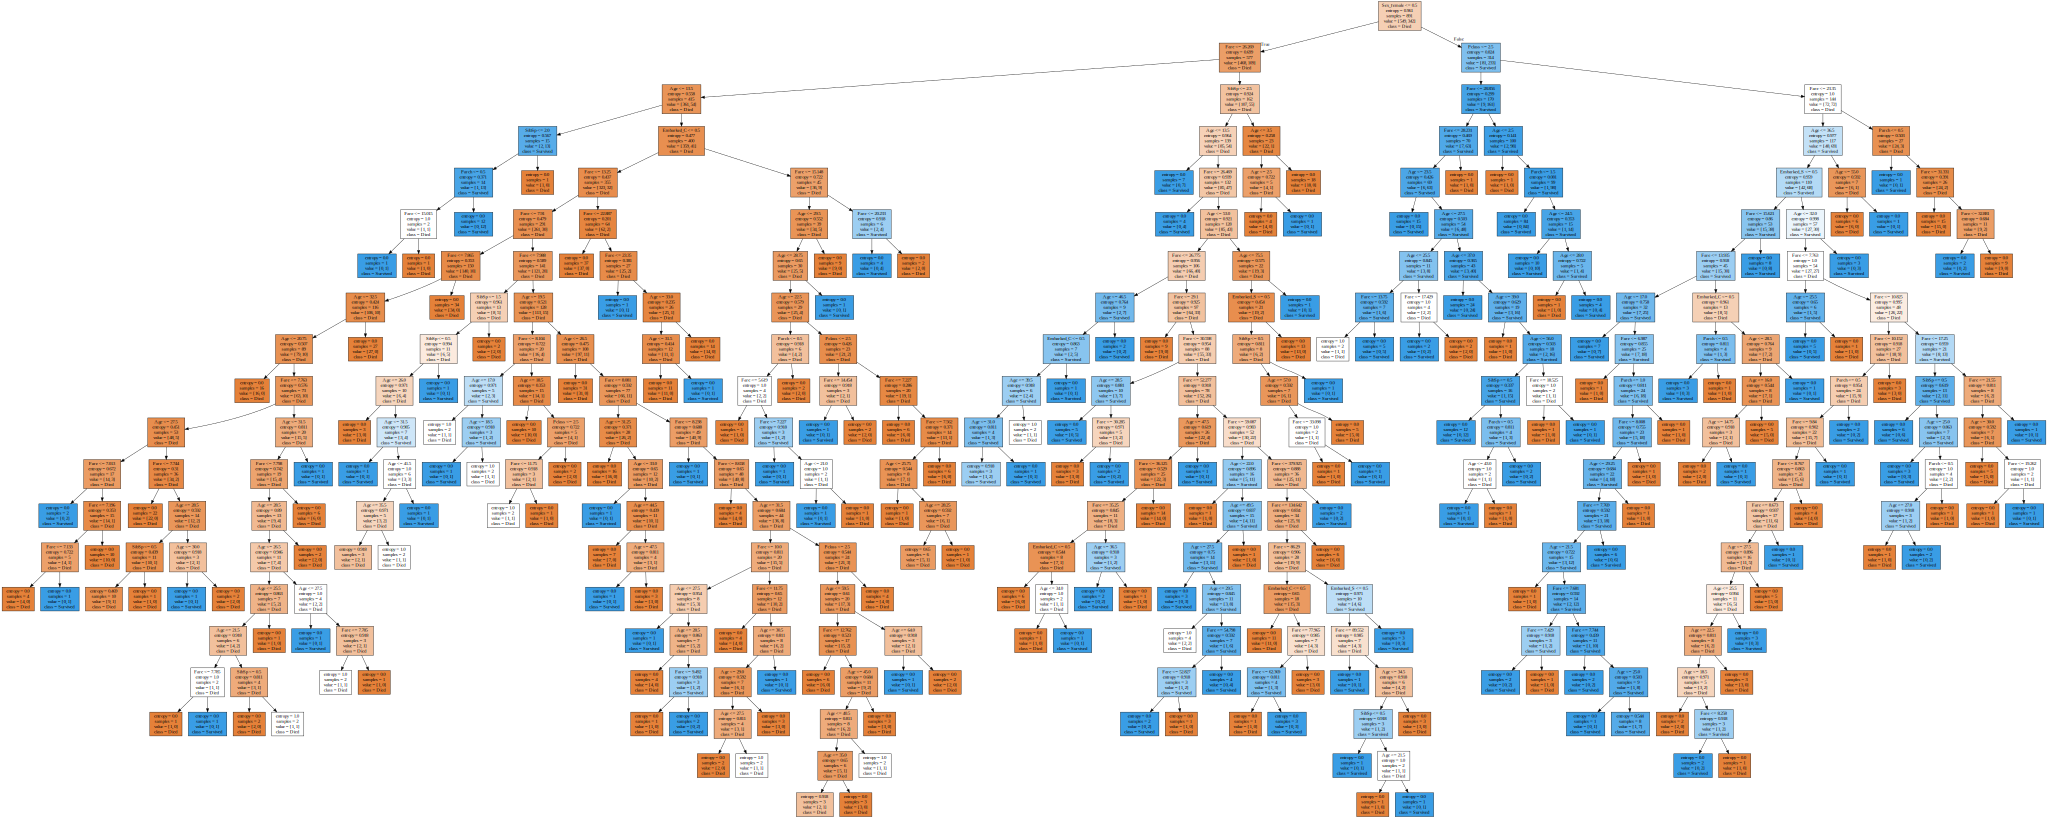

In [16]:
graph = Source(tree.export_graphviz(clf, out_file=None, feature_names=list(X), class_names=['Died', 'Survived'], filled=True))
display(SVG(graph.pipe(format='svg')))

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [24]:
clf.score(X, y)

0.9797979797979798

In [25]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [26]:
clf.score(X_train, y_train)

0.9798657718120806

In [27]:
clf.score(X_test, y_test)

0.7627118644067796

## Ограничим глубину дерева

In [28]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [29]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [30]:
clf.score(X_train, y_train)

0.8406040268456376

In [31]:
clf.score(X_test, y_test)

0.8067796610169492

In [65]:
max_depth_values = range(1, 100)

In [66]:
scores_data = pd.DataFrame()

In [67]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    
    temp_score_data = pd.DataFrame({'max_depth' : [max_depth],
                                    'train_score' : [train_score],
                                    'test_score' : [test_score],
                                    'mean_cross_val_score' : mean_cross_val_score})
    scores_data = scores_data.append(temp_score_data)

In [68]:
scores_data

,max_depth,train_score,test_score,mean_cross_val_score
0,1,0.781879,0.796610,0.781961
0,2,0.805369,0.776271,0.770196
0,3,0.823826,0.820339,0.790322
0,4,0.833893,0.823729,0.788627
0,5,0.840604,0.806780,0.795350
...,...,...,...,...
0,95,0.979866,0.779661,0.770182
0,96,0.979866,0.762712,0.778585
0,97,0.979866,0.769492,0.775224
0,98,0.979866,0.783051,0.763459


## Соединим две колонки score в одну с помощью метода melt()

In [71]:
scores_data_long = pd.melt(scores_data, id_vars='max_depth', value_vars=['train_score', 'test_score', 'mean_cross_val_score'],
                           var_name='set_type', value_name='score')

In [72]:
scores_data_long

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604
...,...,...,...
292,95,mean_cross_val_score,0.770182
293,96,mean_cross_val_score,0.778585
294,97,mean_cross_val_score,0.775224
295,98,mean_cross_val_score,0.763459


In [74]:
scores_data_long.query("set_type == 'mean_cross_val_score'").head(20)

,max_depth,set_type,score
198,1,mean_cross_val_score,0.781961
199,2,mean_cross_val_score,0.770196
200,3,mean_cross_val_score,0.790322
201,4,mean_cross_val_score,0.788627
202,5,mean_cross_val_score,0.795350
203,6,mean_cross_val_score,0.805434
204,7,mean_cross_val_score,0.800378
205,8,mean_cross_val_score,0.798683
206,9,mean_cross_val_score,0.795308
207,10,mean_cross_val_score,0.807073


In [52]:
sns.set(rc={'figure.figsize':(15,10)})

<AxesSubplot:xlabel='max_depth', ylabel='score'>

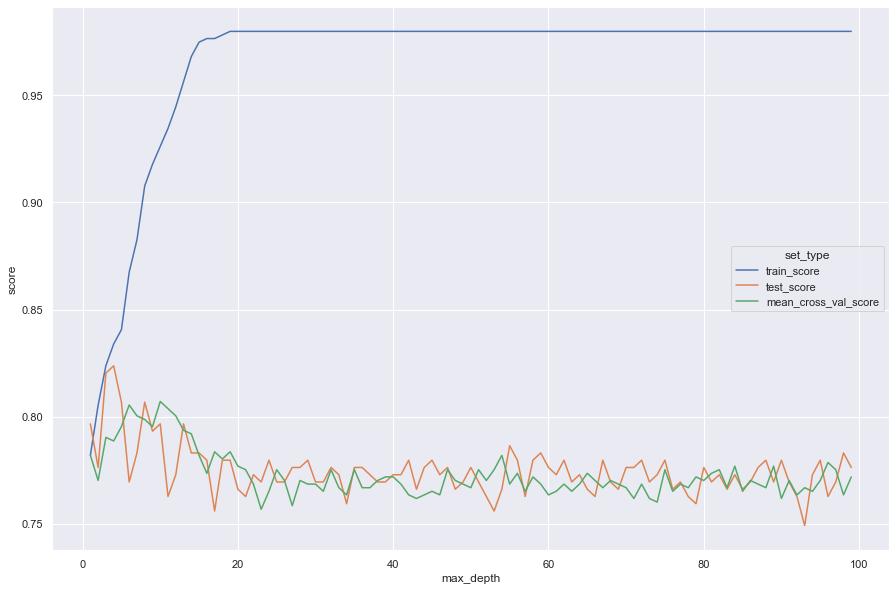

In [73]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long)

## Кроссвалидация

In [11]:
from sklearn.model_selection import cross_val_score

In [85]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [86]:
cross_val_score(clf, X_train, y_train, cv=5).mean()

0.7886274509803922

## При max_depth = 10 достигается максимальная кроссвалидация

In [87]:
best_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [89]:
best_clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [90]:
best_clf.score(X_test, y_test)

0.9261744966442953

## GridSearchCV

In [4]:
clf = tree.DecisionTreeClassifier()

In [6]:
from sklearn.model_selection import GridSearchCV

In [6]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

In [7]:
parametrs = {'criterion' : ['gini', 'entropy'], 'max_depth' :range(1,30)}

In [8]:
grid_search_cv_clf = GridSearchCV(clf, parametrs, cv=5)

In [24]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30)})

In [25]:
grid_search_cv_clf.best_params_

{'criterion': 'entropy', 'max_depth': 12}

In [26]:
best_clf = grid_search_cv_clf.best_estimator_

In [28]:
best_clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 12,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

In [29]:
best_clf.score(X_test, y_test)

0.7694915254237288

## Найдем Precision и Recall (точность и полнота)

In [34]:
from sklearn.metrics import precision_score, recall_score

In [32]:
y_pred = best_clf.predict(X_test)

In [33]:
precision_score(y_test, y_pred)

0.7407407407407407

In [35]:
recall_score(y_test, y_pred)

0.6666666666666666

## Вероятность отнесения пассажиров к классам

In [39]:
y_predicted_prob = best_clf.predict_proba(X_test)

In [40]:
y_predicted_prob

array([[0.        , 1.        ],
       [1.        , 0.        ],
       [0.80952381, 0.19047619],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.16666667, 0.83333333],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.6       , 0.4       ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.6       , 0.4       ],
       [0.93877551, 0.06122449],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.25      , 0.75      ],
       [0.6       , 0.4       ],
       [0.80952381, 0.19047619],
       [0.93877551, 0.06122449],
       [1.        , 0.        ],
       [0.25      , 0.75      ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.

### Отберем вероятность отнесения к положительному классу

In [41]:
y_predicted_prob[:, 1]

array([1.        , 0.        , 0.19047619, 1.        , 1.        ,
       0.        , 0.83333333, 0.        , 0.        , 1.        ,
       1.        , 0.        , 0.        , 0.        , 0.4       ,
       1.        , 0.        , 0.4       , 0.06122449, 0.        ,
       0.        , 0.75      , 0.4       , 0.19047619, 0.06122449,
       0.        , 0.75      , 0.        , 0.        , 1.        ,
       0.19047619, 1.        , 0.4       , 1.        , 0.19047619,
       0.4       , 0.4       , 0.83333333, 1.        , 0.        ,
       0.        , 1.        , 0.        , 0.09677419, 0.        ,
       0.        , 0.19047619, 0.06122449, 0.09677419, 0.        ,
       1.        , 1.        , 0.        , 1.        , 0.        ,
       1.        , 1.        , 0.        , 1.        , 0.4       ,
       0.33333333, 1.        , 1.        , 0.        , 0.09677419,
       1.        , 0.        , 0.        , 0.        , 1.        ,
       0.        , 1.        , 1.        , 1.        , 0.     

<AxesSubplot:>

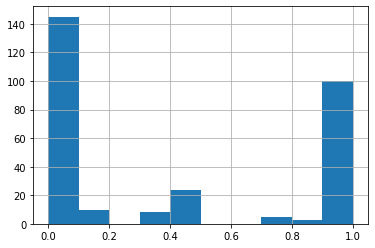

In [42]:
pd.Series(y_predicted_prob[:, 1]).hist()

In [52]:
np.where(y_predicted_prob[:, 1] > 0.8, 1, 0)

array([1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0])

In [73]:
pd.Series(y_predicted_prob[:, 1]).unique()

array([1.        , 0.        , 0.19047619, 0.83333333, 0.4       ,
       0.06122449, 0.75      , 0.09677419, 0.33333333, 0.16666667])

In [66]:
y_pred = np.where(y_predicted_prob[:, 1] > 0.8, 1, 0)

In [67]:
precision_score(y_test, y_pred)

0.7572815533980582

In [68]:
recall_score(y_test, y_pred)

0.65

## Roc curve

In [74]:
from sklearn.metrics import roc_curve, auc

<Figure size 1080x720 with 0 Axes>

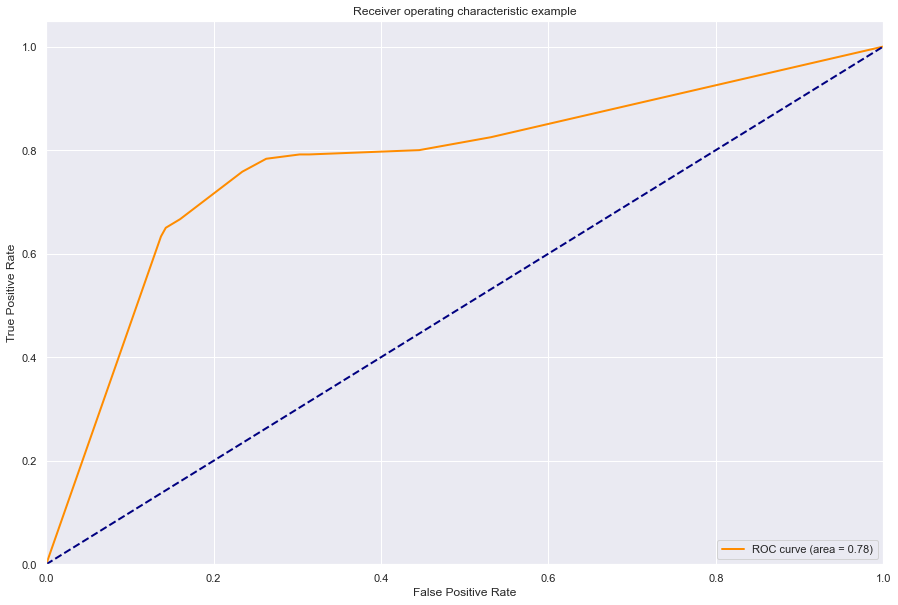

In [119]:
plt.figure(figsize=(15,10))
fpr, tpr, threshold = roc_curve(y_test, y_predicted_prob[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1],  [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [1]:
from sklearn.ensemble import RandomForestClassifier

In [2]:
clf_rf = RandomForestClassifier()

In [3]:
parametrs = {'n_estimators' : [10, 20, 30], 'max_depth' : [2, 5, 7, 10]}

In [7]:
grid_search_cv_clf = GridSearchCV(clf_rf, parametrs, cv=5)

In [15]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 5, 7, 10],
                         'n_estimators': [10, 20, 30]})

In [16]:
grid_search_cv_clf.best_params_

{'max_depth': 7, 'n_estimators': 20}

In [17]:
best_clf = grid_search_cv_clf.best_estimator_

In [18]:
best_clf.score(X_test, y_test)

0.8

## Значения весов на сколько сильно фича  уменьшала неопределенность

In [19]:
best_clf.feature_importances_

array([0.09687351, 0.1450535 , 0.04900589, 0.0423398 , 0.20230344,
       0.21185682, 0.20653708, 0.02009015, 0.00673909, 0.01920072])

In [20]:
feature_importances = best_clf.feature_importances_

In [21]:
feature_importances_df = pd.DataFrame({'features' : list(X_train), 
                                    'feature_importances' : feature_importances})

In [23]:
feature_importances_df.sort_values('feature_importances', ascending=False)

,features,feature_importances
5,Sex_female,0.211857
6,Sex_male,0.206537
4,Fare,0.202303
1,Age,0.145053
0,Pclass,0.096874
2,SibSp,0.049006
3,Parch,0.042340
7,Embarked_C,0.020090
9,Embarked_S,0.019201
8,Embarked_Q,0.006739


<AxesSubplot:ylabel='feature_importances'>

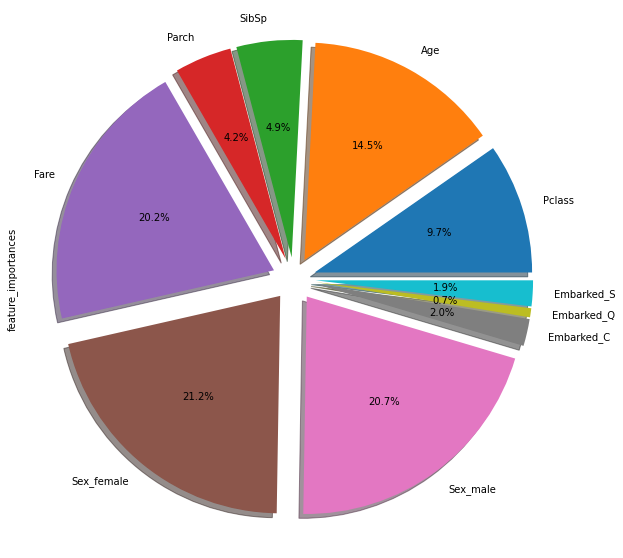

In [45]:
feature_importances_df.plot.pie(y='feature_importances',
                                figsize=(10, 10),
                                labels=feature_importances_df.features,
                                explode=[0.1]*len(X_train.columns),
                                shadow=True,
                                legend=False, autopct='%0.1f%%')

In [46]:
heart_df = pd.read_csv('DataSets/heart.csv')

In [48]:
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [49]:
X = heart_df.drop('target', axis=1)

In [50]:
y = heart_df.target

In [69]:
np.random.seed(0)

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [76]:
clf = RandomForestClassifier(10, max_depth=5)

In [77]:
clf.fit(X, y)

RandomForestClassifier(max_depth=5, n_estimators=10)

In [78]:
imp = pd.DataFrame(clf.feature_importances_, index=X.columns, columns=['importance'])

In [110]:
imp = imp.sort_values('importance', ascending=False)

<AxesSubplot:>

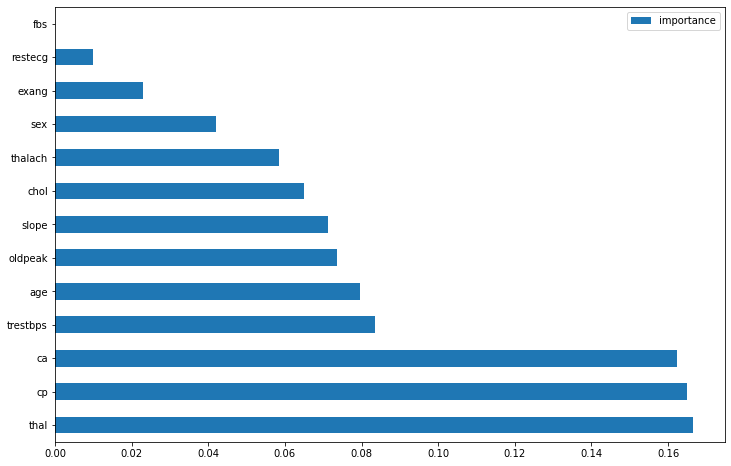

In [111]:
imp.plot(kind='barh', figsize=(12,8))

<AxesSubplot:xlabel='importance'>

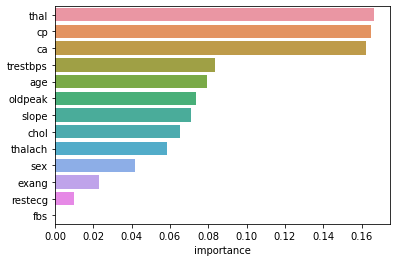

In [112]:
sns.barplot(data=imp, x=imp.importance, y=imp.index,)